In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
for col in df_train.columns:
    msg = 'column:{:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column:PassengerId	 Percent of NaN value: 0.00%
column:  Survived	 Percent of NaN value: 0.00%
column:    Pclass	 Percent of NaN value: 0.00%
column:      Name	 Percent of NaN value: 0.00%
column:       Sex	 Percent of NaN value: 0.00%
column:       Age	 Percent of NaN value: 19.87%
column:     SibSp	 Percent of NaN value: 0.00%
column:     Parch	 Percent of NaN value: 0.00%
column:    Ticket	 Percent of NaN value: 0.00%
column:      Fare	 Percent of NaN value: 0.00%
column:     Cabin	 Percent of NaN value: 77.10%
column:  Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = 'column:{:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column:PassengerId	 Percent of NaN value: 0.00%
column:    Pclass	 Percent of NaN value: 0.00%
column:      Name	 Percent of NaN value: 0.00%
column:       Sex	 Percent of NaN value: 0.00%
column:       Age	 Percent of NaN value: 20.57%
column:     SibSp	 Percent of NaN value: 0.00%
column:     Parch	 Percent of NaN value: 0.00%
column:    Ticket	 Percent of NaN value: 0.00%
column:      Fare	 Percent of NaN value: 0.24%
column:     Cabin	 Percent of NaN value: 78.23%
column:  Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

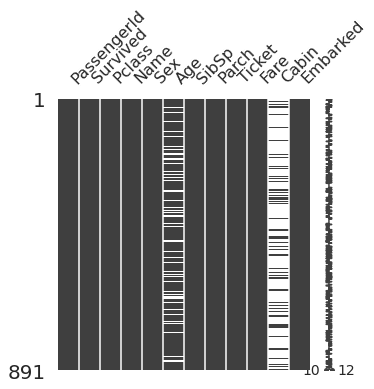

In [10]:
msno.matrix(df_train, figsize=(5,5))

<AxesSubplot:>

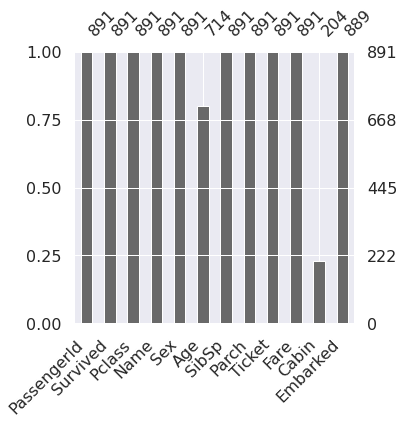

In [11]:
msno.bar(df_train, figsize=(5,5))

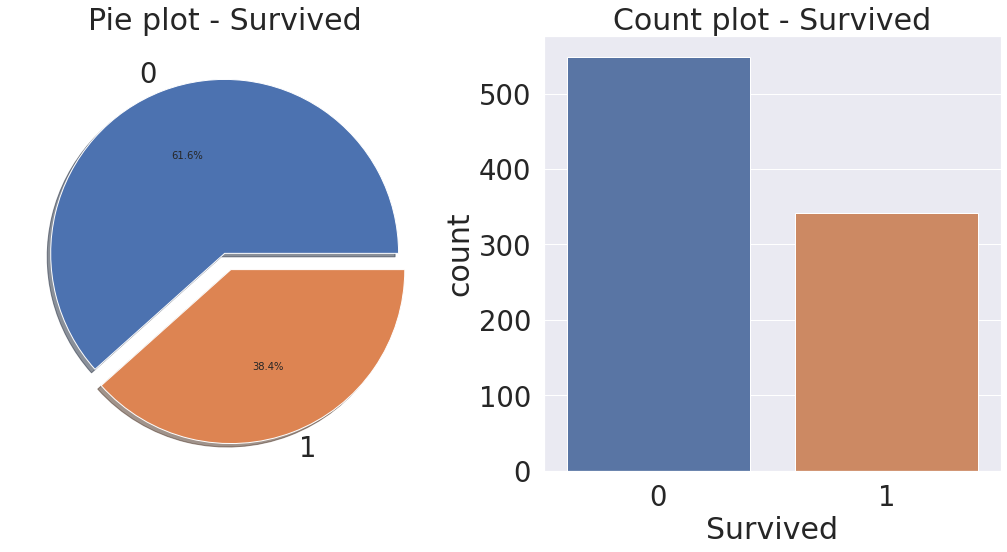

In [12]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

## 2.1. Pclass

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='rocket_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

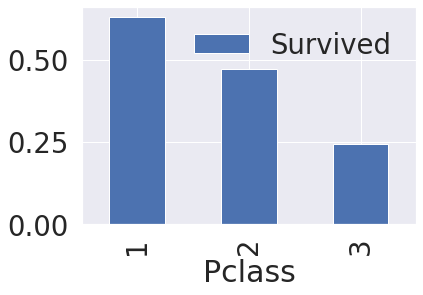

In [18]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot(kind='bar')

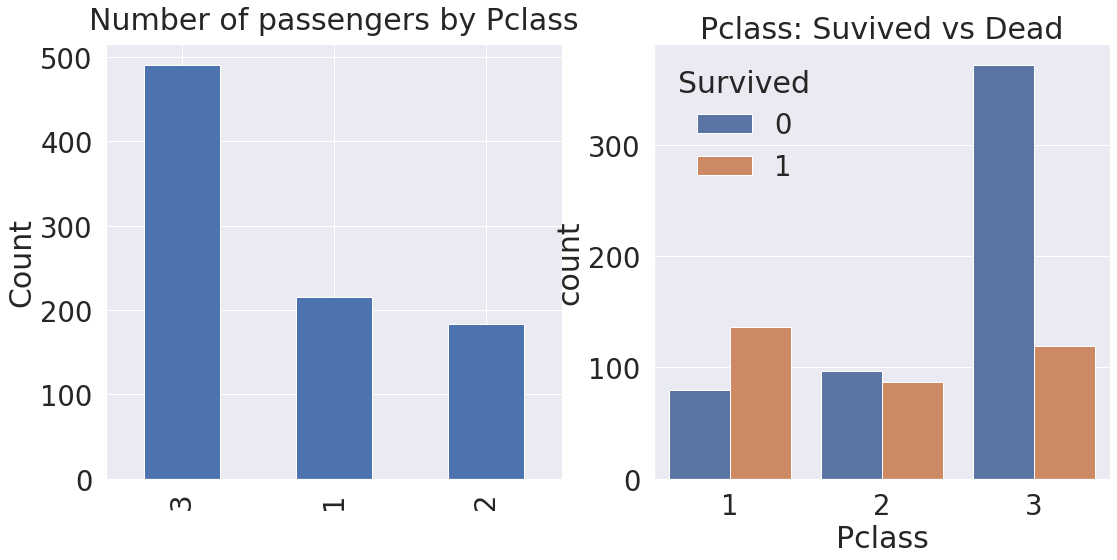

In [19]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Number of passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Suvived vs Dead')
plt.show()

## 2.2. Sex

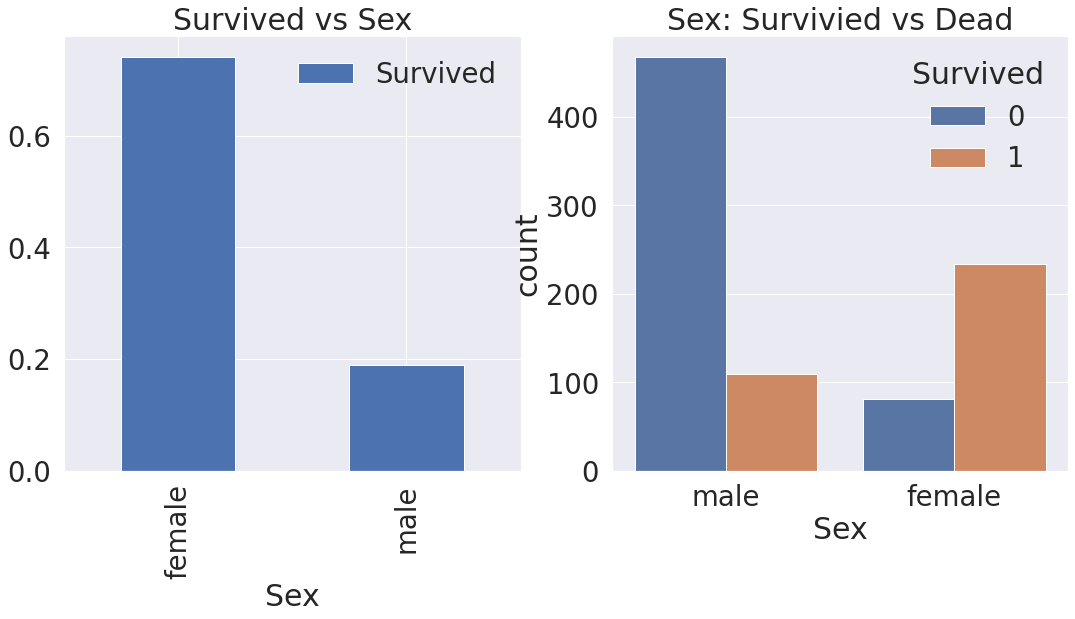

In [20]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot(kind='bar', ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survivied vs Dead')
plt.show()

In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='rocket_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.2. Both Sex and Pclass

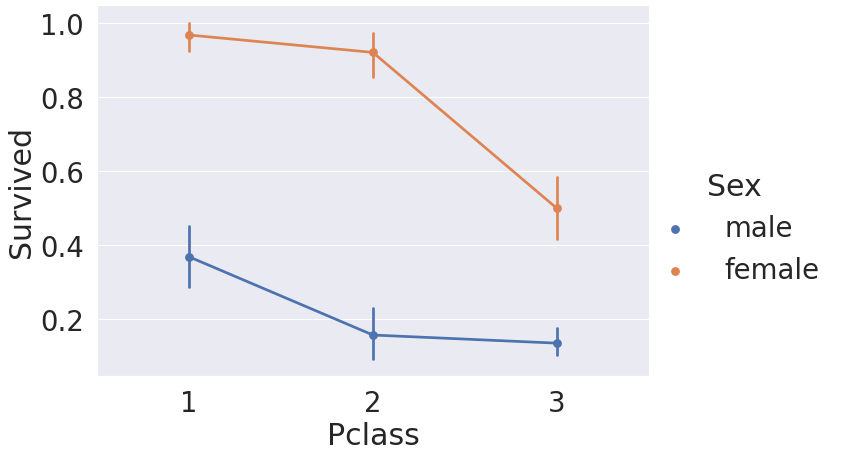

In [22]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

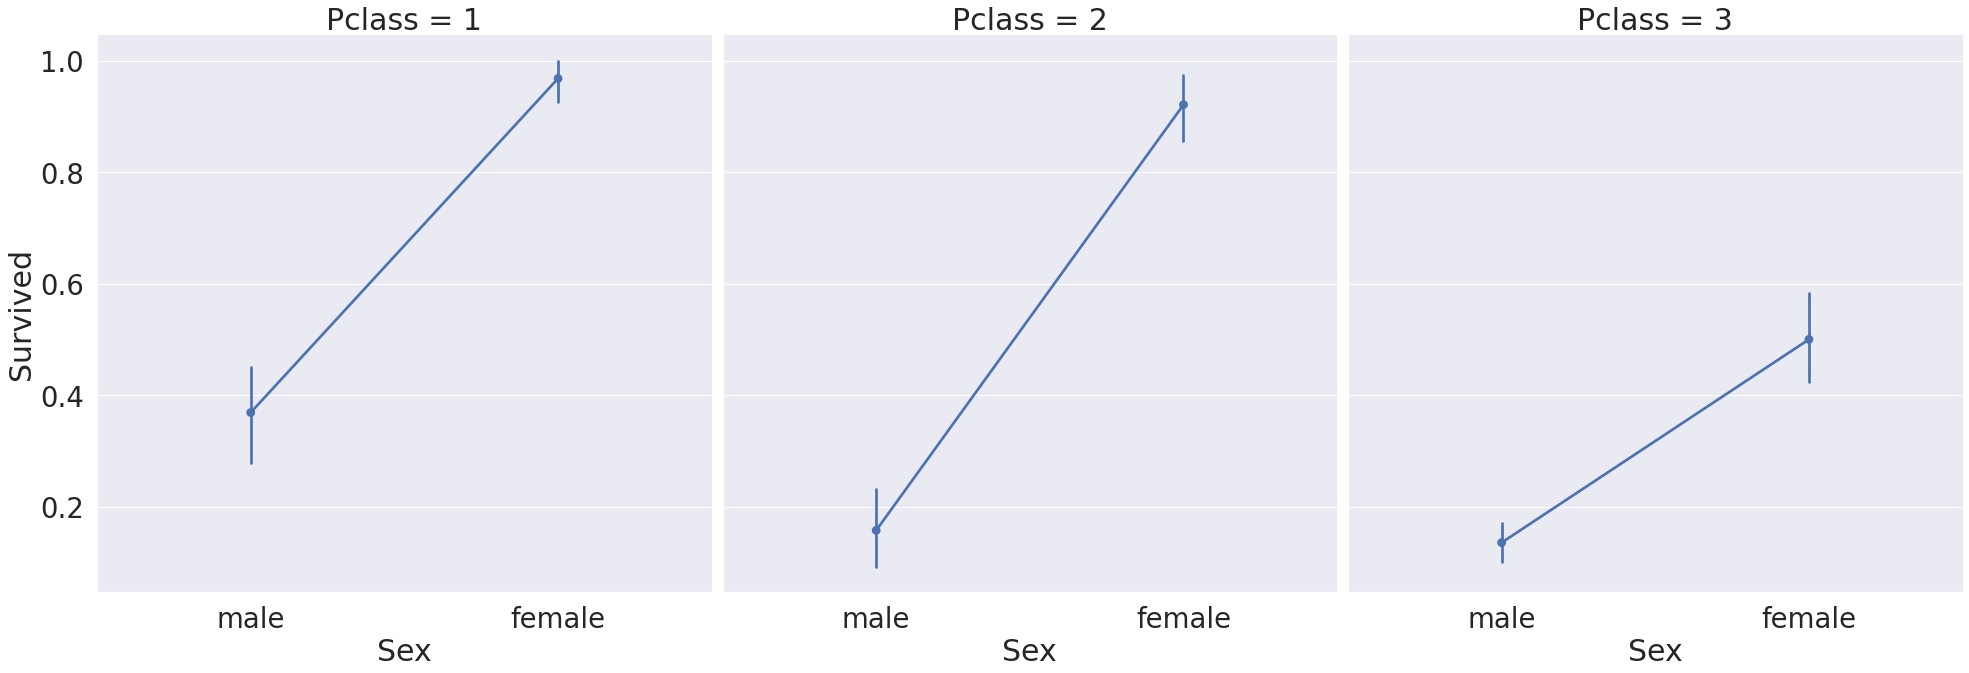

In [23]:
sns.factorplot(x='Sex',y='Survived', col='Pclass', data=df_train, saturatoin=0.5, size=9, aspect=1)

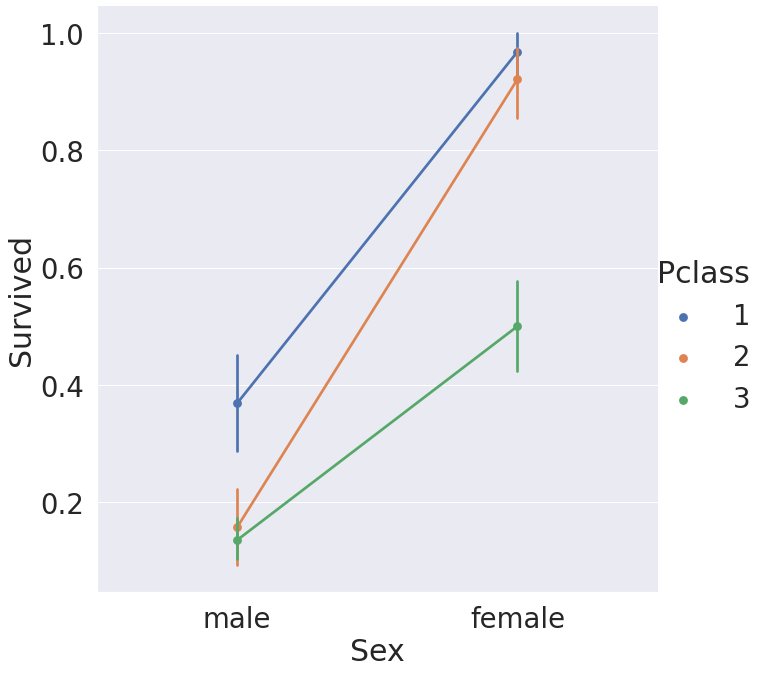

In [24]:
sns.factorplot(x='Sex',y='Survived', hue='Pclass', data=df_train, saturatoin=0.5, size=9, aspect=1)

### 3. Age

In [26]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


KDE(커널밀도추정) 학습 해 볼것!

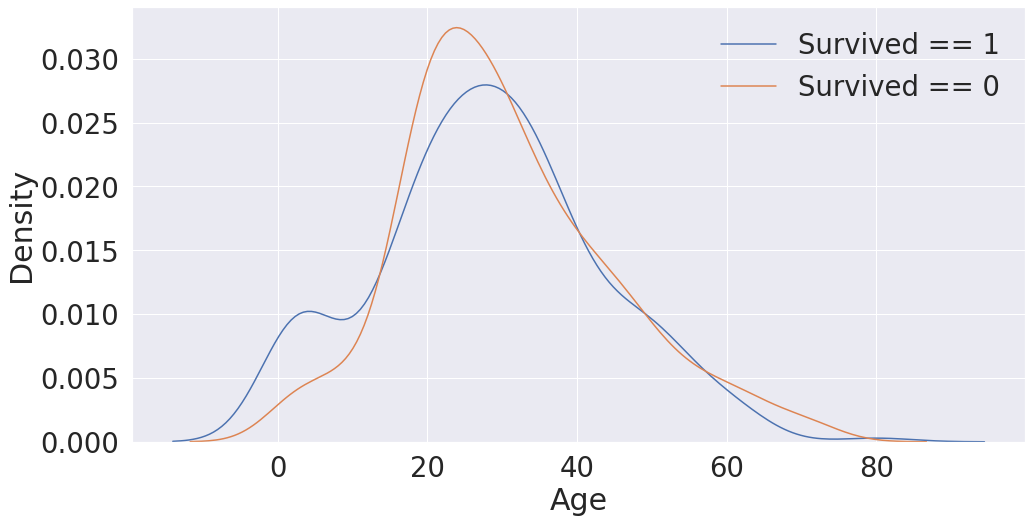

In [32]:
f, ax = plt.subplots(1,1,figsize=(16,8))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax= ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax= ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<AxesSubplot:>

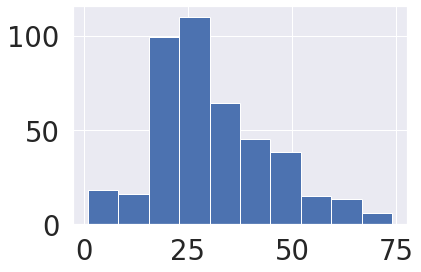

In [33]:
df_train[df_train['Survived'] == 0]['Age'].hist()

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df_train.loc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [40]:
df_train.iloc[1,3]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [44]:
for row in df_train.iterrows():
    break
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                               22.0
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [46]:
# f = plt.figure(figsize=(10,10))

# f, ax = plt.subplots(1,1,figsize=(10,10))

# plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

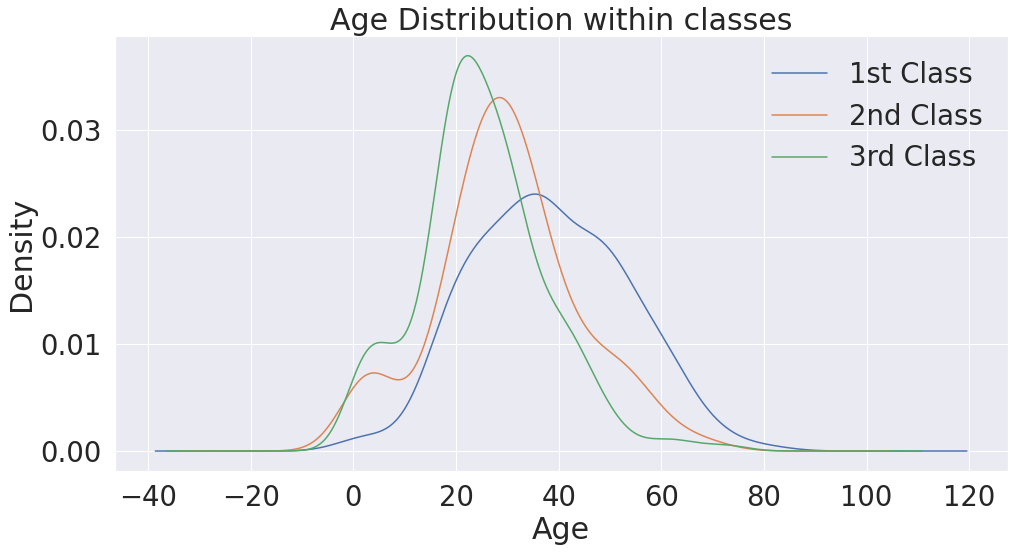

In [54]:
f, ax = plt.subplots(1,1,figsize=(16,8))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

ax.set_xlabel('Age')
ax.set_title('Age Distribution within classes')
ax.legend(['1st Class','2nd Class','3rd Class'])

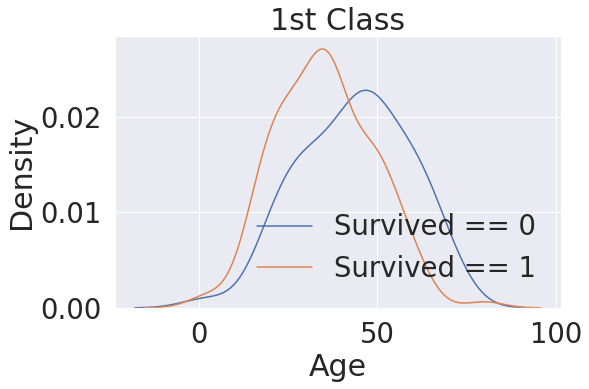

In [62]:
f, ax = plt.subplots(1,1,figsize=(8,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==1)]['Age'], ax= ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==1)]['Age'], ax= ax)                      
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st Class')
plt.show()

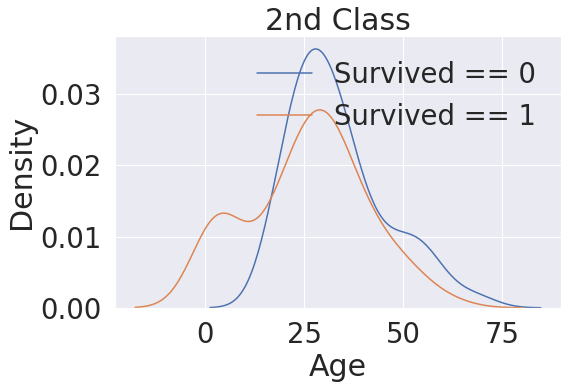

In [63]:
f, ax = plt.subplots(1,1,figsize=(8,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'], ax= ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], ax= ax)                      
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2nd Class')
plt.show()

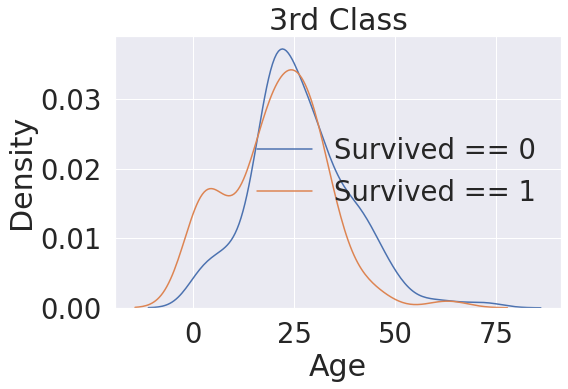

In [64]:
f, ax = plt.subplots(1,1,figsize=(8,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'], ax= ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'], ax= ax)                      
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3rd Class')
plt.show()

In [72]:
survived = df_train[df_train['Age'] < 10]['Survived']
survived.sum()
survived.shape[0]

62

In [73]:
survived_ratio_age = []

for i in range(1, 80):
    survived = df_train[df_train['Age'] < i]['Survived']
    survived_ratio_age.append(survived.sum()/survived.shape[0])

plt.figure(figsize=(10,8))
plt.plot(survived_ratio_age)
plt.title('Survival ratio depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-X)')
plt.show()

## 2.3. Pclass, Sex, Age

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pcalss')